In [130]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow.keras as keras
import tensorflow as tf
print(tf.__version__)

#load in files
trainingImages = np.load('trnImage.npy')
trainingLabels = np.load('trnLabel.npy')
testingImages = np.load('tstImage.npy')
testingLabels = np.load('tstLabel.npy')
testingLabels = np.squeeze(testingLabels) #used to correct 10000% accuracy
trainingidx = 0 #initialize variables to look at a particular image

2.0.0


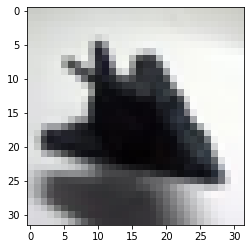

In [131]:
plt.imshow(trainingImages[:,:,:,trainingidx])

In [132]:
def computeFeatures(image):
    # This function computes the HOG features with the parsed hyperparameters and returns the features as hog_feature. 
    # By setting visualize=True we obtain an image, hog_as_image, which can be plotted for insight into extracted HOG features.
    hog_feature, hog_as_image = skimage.feature.hog(image, visualize=True, block_norm='L2-Hys')
    return hog_feature, hog_as_image

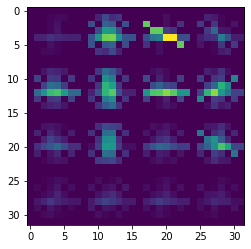

In [133]:
#initialize arrays for storage
hog_training_array = np.zeros((10000,324))
hog_testing_array = np.zeros((1000,324))

#identify features for every training image and store them
for x in range(10000):
    trainingFeatures, hog_image = computeFeatures(trainingImages[:,:,:,x])
    hog_training_array[x] = trainingFeatures

#identify features for every testing image and store them
for y in range(1000):
    testingFeatures, testing_hog_image = computeFeatures(testingImages[:,:,:,y])
    hog_testing_array[y] = testingFeatures
plt.imshow(hog_image)
plt.show(block=False)

In [134]:
#normalize data
normaliser = StandardScaler().fit(hog_training_array)
trainingData = normaliser.transform(hog_training_array)
testingData = normaliser.transform(hog_testing_array)

#set values for SVM
errorTerm = 9
kernelType = 'rbf'
noOfDegrees = 3 #only useful for poly kernel
gammaType = 'scale' #only useful for non-linear kernels
coefficient = 0.0 #only useful for poly and sigmoid kernels
model = SVC(C=errorTerm, kernel=kernelType, degree=noOfDegrees, gamma=gammaType, coef0=coefficient)
model.fit(trainingData, trainingLabels)
predictedLabelsSVM = model.predict(testingData)

C:\Users\daddycool\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
#calculate accuracy of predictedLabels vs. testingLabels
accuracy = (np.sum(np.equal(testingLabels,predictedLabelsSVM))/len(testingLabels))*100
print ('Accuracy on testingData: {0:.2f}%'.format(accuracy))
mSqrError = mean_squared_error(testingLabels, predictedLabelsSVM)
print ('Mean squared error on testingData: {0:.2f}%'.format(mSqrError))

Accuracy on testingData: 60.60%
mSqrError on testingData: 7.23%


Text(59.24000000000005, 0.5, 'Predictions')

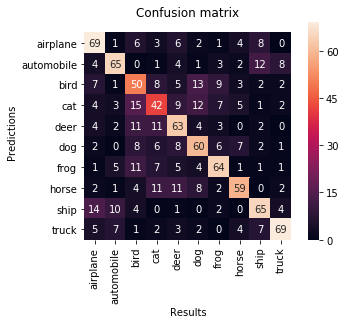

In [136]:
#create confusion matrix to represent individual category accuracy
confusionMatrix = confusion_matrix(testingLabels, predictedLabelsSVM)
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
heatMap = sns.heatmap(confusionMatrix, annot=True, linewidths=0, square='True')

#fix for heatmap not showing top and bottom layers properly
bottom, top = heatmap.get_ylim()
heatMap.set_ylim(bottom-0.5, top) 

#set categories to represent the numbers
heatMap.set_xticklabels(categories, rotation=90)
heatMap.set_yticklabels(categories, rotation=0)
heatMap.set_title("Confusion matrix")
heatMap.set_xlabel("Results")
heatMap.set_ylabel("Predictions")

In [137]:
number_of_classes = np.max(trainingLabels)+1

# Build our network architecture by stacking layers in a Keras Sequential object.
model = keras.Sequential()

# Create the input layer, this takes an argument of the input data shape (i.e. number of features)
model.add(keras.layers.InputLayer(input_shape=(trainingData.shape[1],)))

# Create hidden layers
model.add(keras.layers.Dense(324, activation='sigmoid')) # first layer

# Create output layer to get predicted class labels.
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))

# Generate a callable keras Model object which contains our architecture.
# This allows us to train and predict our neural network on the datasets.
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Fit our model to the data
history = model.fit(trainingData, trainingLabels, validation_data=(testingData, testingLabels), epochs=230, verbose=0)

# Predict probabilities of classes for the testing set.
predicted_probabilities = model.predict(testingData)

# Use argmax to get the predicted class label
predictedLabelsNN = np.argmax(predicted_probabilities, axis=1)

In [142]:
# Calculate the percentage accuracy rate on test set
accuracy = (np.sum(np.equal(testingLabels,predictedLabelsNN))/len(testingLabels))*100
print ('Accuracy on testingData: {0:.2f}%'.format(accuracy))
mSqrError = mean_squared_error(testingLabels, predictedLabelsNN)
print ('Mean squared error on testingData: {0:.2f}%'.format(mSqrError))

Accuracy on testingData: 54.20%
mSqrError on testingData: 7.79%


Text(59.24000000000005, 0.5, 'Predictions')

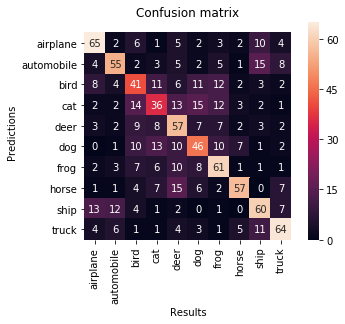

In [141]:
#create confusion matrix to represent individual category accuracy
confusionMatrix = confusion_matrix(testingLabels, predictedLabelsNN)
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
heatMap = sns.heatmap(confusionMatrix, annot=True, linewidths=0, square='True')

#fix for heatmap not showing top and bottom layers properly
bottom, top = heatmap.get_ylim()
heatMap.set_ylim(bottom-0.5, top) 

#set categories to represent the numbers
heatMap.set_xticklabels(categories, rotation=90)
heatMap.set_yticklabels(categories, rotation=0)
heatMap.set_title("Confusion matrix")
heatMap.set_xlabel("Results")
heatMap.set_ylabel("Predictions")